<a href="https://colab.research.google.com/github/inwookbaek/python/blob/main/chapter1_keras_quick_tour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multilayer Perceptron (MLP)

#### A.chapter1-keras-quick-tour

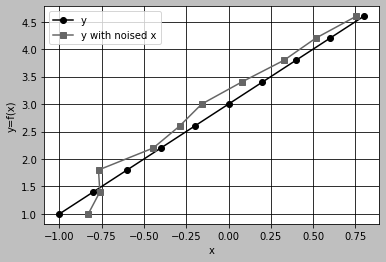

In [ ]:
##### 1. plot-linear-1.1.1.py
'''Utility for plotting a linear function
with and without noise
'''

import numpy as np
import matplotlib.pyplot as plt

want_noise = True
# grayscale plot, comment if color is wanted
plt.style.use('grayscale')

# generate data bet -1,1 interval of 0.2
x = np.arange(-1,1,0.2)
y = 2*x + 3
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.plot(x, y, 'o-', label="y")

if want_noise:
    # generate data with uniform distribution
    noise = np.random.uniform(-0.2, 0.2, x.shape)
    xn = x + noise

    plt.ylabel('y=f(x)')
    plt.plot(xn, y, 's-', label="y with noised x")

plt.legend(loc=0)
plt.grid(b=True)
plt.savefig("linear_regression.png")
plt.show()
plt.close('all')

In [ ]:
##### 2. linear-model-1.2.1.py
'''A simple MLP in Keras implementing linear regression.
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# numpy package
import numpy as np

# keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import plot_model

# generate x data
x = np.arange(-1,1,0.2)
x = np.reshape(x, [-1,1])

# generate y data
y = 2 * x + 3

# True if noise is added to y
is_noisy = True

# add noise if enabled
if is_noisy:
    noise = np.random.uniform(-0.1, 0.1, x.shape)
    x = x + noise

# deep learning method
# build 2-layer MLP network 
model = Sequential()
# 1st MLP has 8 units (perceptron), input is 1-dim
model.add(Dense(units=8, input_dim=1))
# 2nd MLP has 1 unit, output is 1-dim
model.add(Dense(units=1))
# print summary to double check the network
model.summary()
# create a nice image of the network model
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='linear-model.png', show_shapes=True)
# indicate the loss function and use stochastic gradient descent
# (sgd) as optimizer
model.compile(loss='mse', optimizer='sgd')
# feed the network with complete dataset (1 epoch) 100 times
# batch size of sgd is 4
model.fit(x, y, epochs=100, batch_size=4)
# simple validation by predicting the output based on x
ypred = model.predict(x)

# linear algebra method
ones = np.ones(x.shape)
# A is the concat of x and 1s
A = np.concatenate([x,ones], axis=1)
# compute k using using pseudo-inverse
k = np.matmul(np.linalg.pinv(A), y) 
print("k (Linear Algebra Method):")
print(k)
# predict the output using linear algebra solution
yla = np.matmul(A, k)

# print ground truth, linear algebra, MLP solutions
outputs = np.concatenate([y, yla, ypred], axis=1)
print("Ground Truth, Linear Alg Prediction, MLP Prediction")
print(outputs)

# Uncomment to see the output for a new input data 
# that is not part of the training data.
# x = np.array([2])
# ypred = model.predict(x)
# print(ypred)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 0s 3ms/step - loss: 8.2055
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 6.8582
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 4.1965
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 3.1592
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 1.6578
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 1.3257
Epoch 7/100
3/3 [==============================] - 0

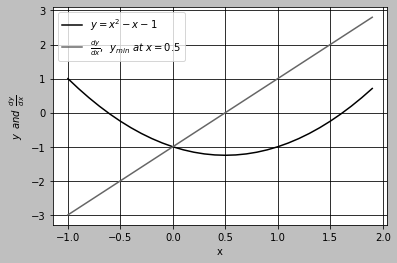

In [ ]:
##### sgd-1.5.3.py 
'''Utility for plotting a 2nd deg polynomial and
its derivative
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('grayscale')
x = np.arange(-1, 2, 0.1)
c = [1, -1, -1]
d = [2, -1]
y = np.polyval(c, x)
z = np.polyval(d, x)
plt.xlabel('x')
plt.ylabel(r'$y\/\/\/and\/\/\/\frac{dy}{dx}$')
plt.plot(x, y, label=r'$y=x^2 -x -1$')
plt.plot(x, z, label=r'$\frac{dy}{dx},\/\/\/y_{min}\/\/at\/\/x=0.5$')
plt.legend(loc=0)
plt.grid(b=True)
plt.savefig("sgd.png")
plt.show()
plt.close('all')

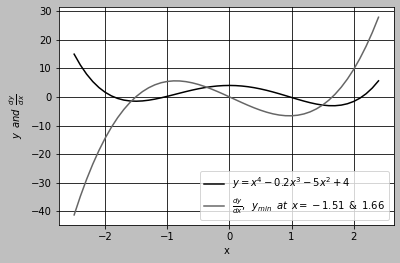

In [ ]:
# sgd-2-min-1.5.4.py 
'''Utility for plotting a polynomial with 2 minima 
and its derivative
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('grayscale')
x = np.arange(-2.5, 2.5, 0.1)
c = [1, -0.2, -5, 0, 4]
d = [4, -0.6, -10, 0]
y = np.polyval(c, x)
z = np.polyval(d, x)
plt.xlabel('x')
plt.ylabel(r'$y\/\/\/and\/\/\/\frac{dy}{dx}$')
plt.plot(x, y, label=r'$y=x^4 -0.2x^3 -5x^2 +4$')
plt.plot(x, z, label=r'$\frac{dy}{dx},\/\/\/y_{min}\/\/\/at\/\/\/x=-1.51\/\/\/&\/\/\/1.66$')
plt.legend(loc=0)
plt.grid(b=True)
plt.savefig("sgd-2-min.png")
plt.show()
plt.close('all')

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


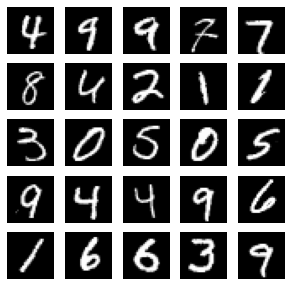

In [ ]:
# 1. mnist-sampler-1.3.1.py
# https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter1-keras-quick-tour/mnist-sampler-1.3.1.py#
'''
Demonstrates how to sample and plot MNIST digits
using Keras API
https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.savefig("mnist-samples.png")
plt.show()
plt.close('all')

##### 1. mlp-mnist-1.3.2.py
https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter1-keras-quick-tour/mlp-mnist-1.3.2.py

In [ ]:
'''
A MLP network for MNIST digits classification

98.3% test accuracy in 20epochs

https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
#
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

##### 3. cnn-mnist-1.4.1.py /
https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter1-keras-quick-tour/cnn-mnist-1.4.1.py

In [ ]:
''' CNN MNIST digits classification
3-layer CNN for MNIST digits classification 
First 2 layers - Conv2D-ReLU-MaxPool
3rd layer - Conv2D-ReLU-Dropout
4th layer - Dense(10)
Output Activation - softmax
Optimizer - Adam
99.4% test accuracy in 10epochs
https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________

#### 4. rnn-mnist-1.5.1.py 
https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter1-keras-quick-tour/rnn-mnist-1.5.1.py

In [ ]:
'''
RNN for MNIST digits classification
98.3% test accuracy in 20epochs
https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 29s 60ms/step - loss: 1.1558 - accuracy: 0.6510
Epoch 2/20
469/469 [==============================] - 28s 60ms/step - loss: 0.3522 - accuracy: 0.8965
Epoch 3/20
469/469 [==============================] - 28s 60ms/step - loss: 0.2453 - accuracy: 0.9279
Epoch 4/20
469/469 [==============================] - 28s 60ms/step - loss

In [3]:
!git clone https://github.com/inwookbaek/python.git

fatal: destination path 'python' already exists and is not an empty directory.
